In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features
y = covertype.data.targets

df_combined = X.copy()
df_combined['Cover_Type'] = y['Cover_Type']

# metadata
print(covertype.metadata)

# variable information
print(covertype.variables)

{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

# Check-In 2
1. For the data set you have chosen choose any response variable that is numeric (and not discrete) to
model for regression. (This does not have to be directly related to the final goal of your project.)
2. Choose a single variable or variables to use as predictors. (You can try variable selection, but it is not
necessary.)
3. Model your regression and calculate the evaluation metrics on your training and validation data sets.
4. Answer in your notebook if you see evidence of overfitting or underfitting.
5. Use one regularization technique and evaluate its performance.
6. Include code and explanation for the steps above in your notebook.

In [3]:
X.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4

In [4]:
X.corr()["Horizontal_Distance_To_Hydrology"].sort_values()

Soil_Type23                          -0.132244
Wilderness_Area4                     -0.100433
Wilderness_Area1                     -0.097124
Soil_Type20                          -0.078088
Soil_Type10                          -0.071653
Soil_Type17                          -0.071435
Soil_Type16                          -0.067448
Soil_Type22                          -0.051424
Soil_Type30                          -0.049960
Soil_Type4                           -0.049071
Soil_Type19                          -0.043236
Soil_Type3                           -0.041211
Soil_Type21                          -0.039953
Soil_Type14                          -0.038478
Soil_Type1                           -0.035096
Hillshade_9am                        -0.027088
Soil_Type9                           -0.021935
Soil_Type18                          -0.013340
Soil_Type6                           -0.012916
Soil_Type2                           -0.011569
Slope                                -0.010607
Soil_Type5   

Our response variable will be Horizontal_Distance_To_Hydrology. We will be using Elevation and Vertical_Distance_To_Hydrology to predict the response variable because they have the highest correlation with our response variable.

Text(0, 0.5, 'Vertical_Distance_To_Hydrology (m)')

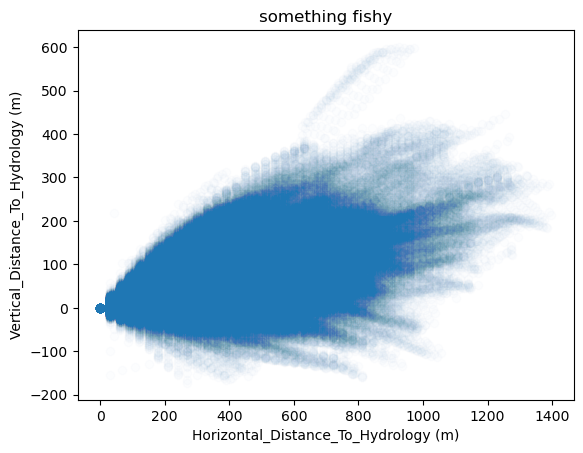

In [5]:
plt.scatter(X["Horizontal_Distance_To_Hydrology"], X["Vertical_Distance_To_Hydrology"], alpha=0.01)
plt.title("something fishy")
plt.xlabel("Horizontal_Distance_To_Hydrology (m)")
plt.ylabel("Vertical_Distance_To_Hydrology (m)")

In [6]:
# regression predictors and response
X_reg = X[["Elevation", "Vertical_Distance_To_Hydrology"]]
y_reg = X[["Horizontal_Distance_To_Hydrology"]]

# normalize values
X_reg = (X_reg - X_reg.min()) / (X_reg.max() - X_reg.min())
y_reg = (y_reg - y_reg.min()) / (y_reg.max() - y_reg.min())

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size = 0.2)

In [7]:
print(X_train)

        Elevation  Vertical_Distance_To_Hydrology
17344    0.505753                        0.266150
480514   0.642321                        0.264858
326705   0.439220                        0.232558
465194   0.660330                        0.304910
100899   0.530265                        0.240310
...           ...                             ...
319702   0.618809                        0.267442
138833   0.521261                        0.266150
530589   0.725863                        0.271318
578163   0.380690                        0.244186
426230   0.589795                        0.496124

[464809 rows x 2 columns]


In [8]:
# linear regression model training
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# train evaluation metrics
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# test evaluation metrics
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

In [9]:
print(np.round(mse_train, 5), np.round(mse_test, 5))
print(np.round(mae_train, 5), np.round(mae_test, 5))
print(np.round(r2_train, 5), np.round(r2_test, 5))

0.01317 0.01324
0.08714 0.08735
0.43086 0.42858


Previous evaluation metrics with unnormalized data resulted in values that were rather hard to interpret. After normalization, we have a much better idea of how our model performs. The training and test metrics are roughly the same, which indicates that the model is not overfitting.

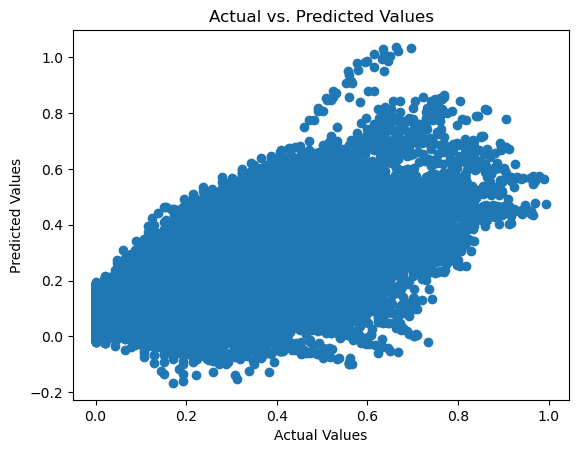

In [10]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Cross Validation

In [11]:
from sklearn.model_selection import KFold, LeaveOneOut, cross_validate, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

In [12]:
# dummy data
X_dummy, y_dummy = make_regression(n_samples=10, n_features=2, noise=0.1)
print("Features (X):\n", X_dummy)
print("Target (y):\n", y_dummy)

Features (X):
 [[ 1.5748262  -0.50663358]
 [-1.52260835 -0.03636697]
 [ 1.2067703   0.04429415]
 [ 1.10414331  0.10620419]
 [ 0.45893519 -0.26158722]
 [ 0.24605965 -1.05429412]
 [ 0.90718429  1.71141583]
 [ 0.9031287   1.13736349]
 [-0.77459307  0.27752568]
 [-0.49648074 -0.12240956]]
Target (y):
 [ 122.42496321 -138.65714662  110.45893052  103.54811954   31.23727511
  -18.50336894  147.80543117  125.13981941  -59.01132803  -49.36435367]


In [13]:
# K-Fold Cross Validation
print("\nK-Fold Cross Validation")
kf = KFold(n_splits=5)  # Splitting the data into 5 folds
for train_index, test_index in kf.split(X_dummy):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_dummy_train, X_dummy_test = X_dummy[train_index], X_dummy[test_index]
    y_dummy_train, y_dummy_test = y_dummy[train_index], y_dummy[test_index]

# Using cross_validate function for K-Fold
# lr = Lasso()
kf_results = cross_validate(model, X_dummy, y_dummy, cv=5, scoring='neg_mean_squared_error', return_estimator=True)
print("K-Fold Test Scores (MSE):", kf_results["test_score"])


K-Fold Cross Validation
TRAIN: [2 3 4 5 6 7 8 9] TEST: [0 1]
TRAIN: [0 1 4 5 6 7 8 9] TEST: [2 3]
TRAIN: [0 1 2 3 6 7 8 9] TEST: [4 5]
TRAIN: [0 1 2 3 4 5 8 9] TEST: [6 7]
TRAIN: [0 1 2 3 4 5 6 7] TEST: [8 9]
K-Fold Test Scores (MSE): [-0.02672666 -0.00133347 -0.00285899 -0.01042396 -0.01790087]


In [14]:
mse_scores = -kf_results["test_score"]
print("Adjusted MSE scores:", mse_scores)
print("Mean MSE:", mse_scores.mean())


Adjusted MSE scores: [0.02672666 0.00133347 0.00285899 0.01042396 0.01790087]
Mean MSE: 0.011848790210246396


The MSE of the model using the training dataset is 0.013. The MSE of the cross validation results average to 0.014. Since the MSE of the cross validation is generally the same as the MSE of the model, the model is generalizing well.

## Feature Importance

In [17]:
coefs = model.coef_[0]
features = ["Elevation", "Vertical_Distance_To_Hydrology"]

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefs,
    'Absolute Coefficient': np.abs(coefs)
})
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)
coef_df

,Feature,Coefficient,Absolute Coefficient
1,Vertical_Distance_To_Hydrology,1.176982,1.176982
0,Elevation,0.274177,0.274177


We found the standardized coefficient values which tells us the variable importance for each feature. Vertical_Distance_To_Hydrology was a much more important feature, with a coefficient of 1.177, while Elevation only had a coefficient of 0.274.

## Regularization technique

In [15]:
# We will pick ridge regression as the regularization technique
from sklearn.linear_model import Ridge

alpha_list = [0, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  print("alpha: " + str(alpha))
  ridge_model = Ridge(alpha = alpha)

  ridge_model.fit(X_train, y_train)
  y_pred_train_ridge = ridge_model.predict(X_train)
  y_pred_test_ridge = ridge_model.predict(X_test)

  # train evaluation metrics
  mse_train = mean_squared_error(y_train, y_pred_train_ridge)
  mae_train = mean_absolute_error(y_train, y_pred_train_ridge)
  r2_train = r2_score(y_train, y_pred_train_ridge)

  # test evaluation metrics
  mse_test = mean_squared_error(y_test, y_pred_test_ridge)
  mae_test = mean_absolute_error(y_test, y_pred_test_ridge)
  r2_test = r2_score(y_test, y_pred_test_ridge)

  print(np.round(mse_train, 5), np.round(mse_test, 5))
  print(np.round(mae_train, 5), np.round(mae_test, 5))
  print(np.round(r2_train, 5), np.round(r2_test, 5))

alpha: 0
0.01317 0.01324
0.08714 0.08735
0.43086 0.42858
alpha: 0.01
0.01317 0.01324
0.08714 0.08735
0.43086 0.42858
alpha: 0.1
0.01317 0.01324
0.08714 0.08735
0.43086 0.42858
alpha: 1
0.01317 0.01324
0.08714 0.08735
0.43086 0.42858
alpha: 10
0.01317 0.01324
0.08716 0.08737
0.43085 0.42857
alpha: 100
0.01318 0.01325
0.08736 0.08756
0.4304 0.42812


For this regression problem, the ridge regression is almost identical to the ODS. alpha does not affect the final results too much.